In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/customdataset.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/test/man/064806.jpg.jpg  
  inflating: /content/test/man/064810.jpg.jpg  
  inflating: /content/test/man/064813.jpg.jpg  
  inflating: /content/test/man/064818.jpg.jpg  
  inflating: /content/test/man/064824.jpg.jpg  
  inflating: /content/test/man/064826.jpg.jpg  
  inflating: /content/test/man/064828.jpg.jpg  
  inflating: /content/test/man/064829.jpg.jpg  
  inflating: /content/test/man/064830.jpg.jpg  
  inflating: /content/test/man/064832.jpg.jpg  
  inflating: /content/test/man/064834.jpg.jpg  
  inflating: /content/test/man/064837.jpg.jpg  
  inflating: /content/test/man/064838.jpg.jpg  
  inflating: /content/test/man/064846.jpg.jpg  
  inflating: /content/test/man/064848.jpg.jpg  
  inflating: /content/test/man/064849.jpg.jpg  
  inflating: /content/test/man/064853.jpg.jpg  
  inflating: /content/test/man/064861.jpg.jpg  
  inflating: /content/test/man/064862.jpg.jpg  
  inflating: /content/test/man/064864

In [ ]:
import tensorflow as tf
import numpy as np
import os
import cv2


In [ ]:

images=tf.data.Dataset.list_files("train/man/*.jpg")

In [ ]:
images.as_numpy_iterator().next()

b'train/man/face_549.jpg'

In [ ]:
def load_image(filename):
  raw = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(raw  , channels=3)
  # print(type(image))
  # image.set_shape([80, 100, 3])
  image = tf.image.resize(image, [128 , 128 ] , "bicubic")
  image = tf.cast(image , tf.uint8)
  image = image /255
  return image


In [ ]:
len(images)

2181

In [ ]:
images=images.map(load_image)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
img=images.as_numpy_iterator().next()

In [ ]:
img

array([[[0.2901961 , 0.41568628, 0.6       ],
        [0.2901961 , 0.41568628, 0.6       ],
        [0.28627452, 0.4117647 , 0.59607846],
        ...,
        [0.15686275, 0.14117648, 0.09803922],
        [0.14901961, 0.13725491, 0.09411765],
        [0.14901961, 0.13333334, 0.09019608]],

       [[0.28235295, 0.40784314, 0.5921569 ],
        [0.28627452, 0.4117647 , 0.59607846],
        [0.2901961 , 0.41568628, 0.6       ],
        ...,
        [0.16862746, 0.15294118, 0.10980392],
        [0.16470589, 0.14901961, 0.10588235],
        [0.16470589, 0.14901961, 0.10588235]],

       [[0.27450982, 0.4       , 0.58431375],
        [0.28627452, 0.40784314, 0.5921569 ],
        [0.29803923, 0.41960785, 0.6039216 ],
        ...,
        [0.18431373, 0.16862746, 0.1254902 ],
        [0.18039216, 0.16470589, 0.12156863],
        [0.18039216, 0.16470589, 0.12156863]],

       ...,

       [[0.3647059 , 0.36862746, 0.3372549 ],
        [0.36862746, 0.37254903, 0.34117648],
        [0.37254903, 0

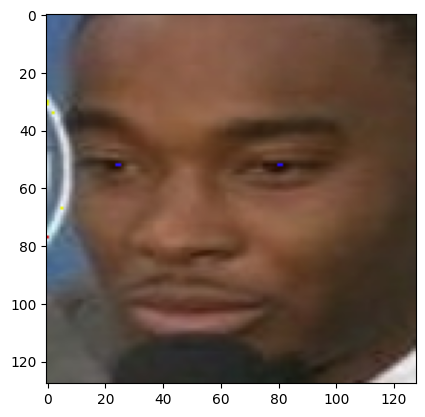

In [ ]:
plt.imshow(img)

In [ ]:
image_generator = images.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator.next()

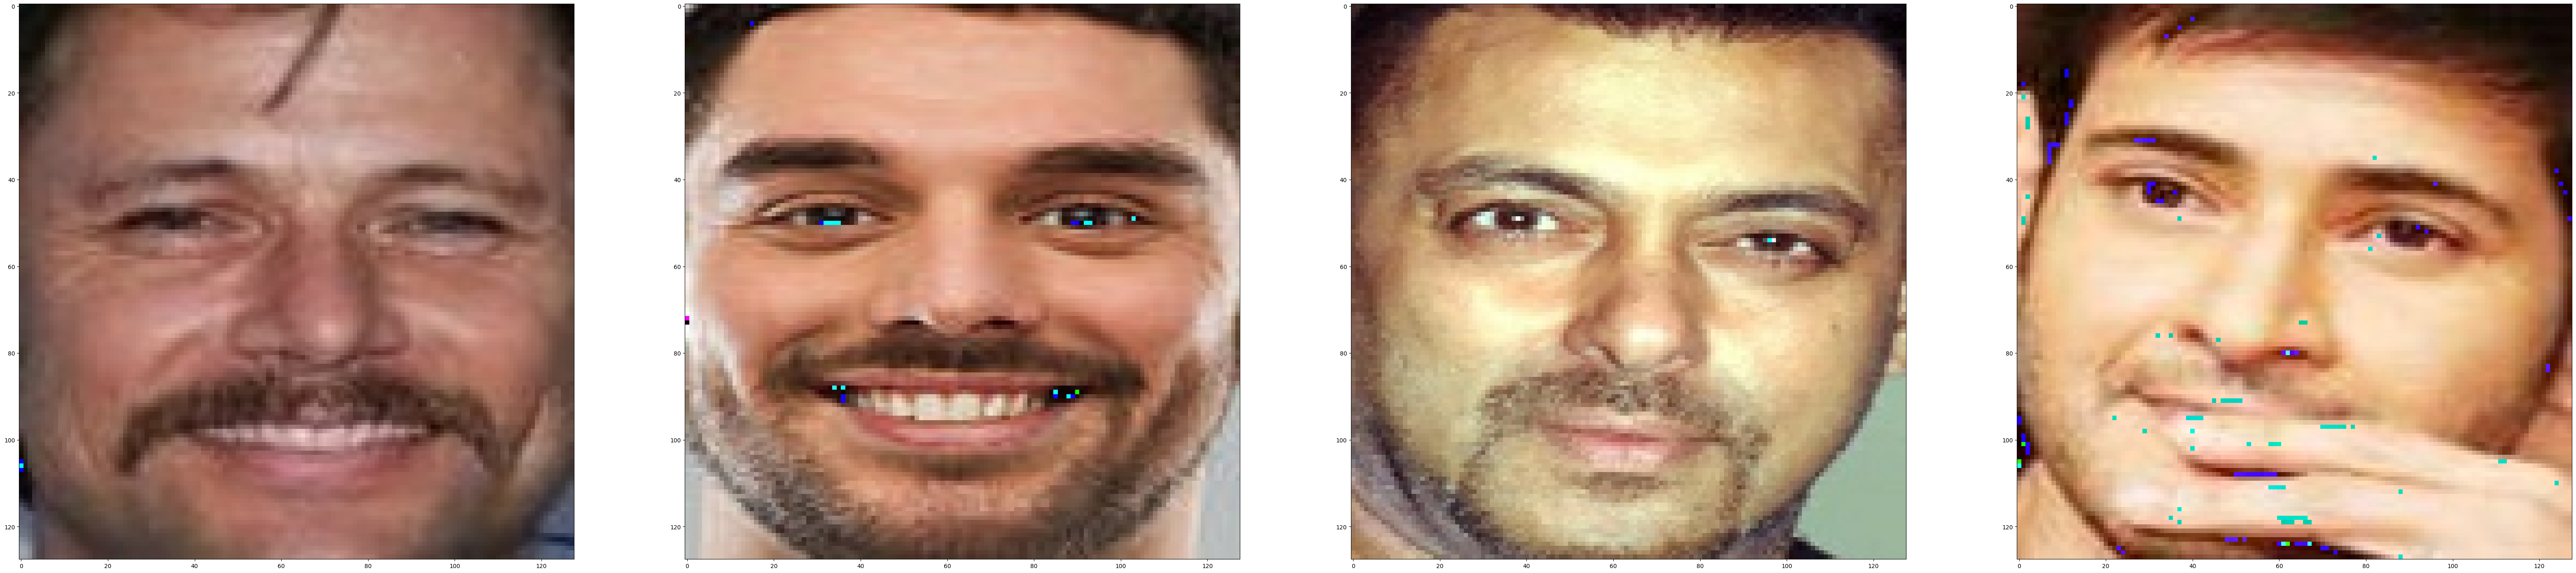

In [ ]:
fig , ax = plt.subplots(ncols= 4 , figsize=(80, 100))
ax[0].imshow(plot_images[0])
ax[1].imshow(plot_images[1])
ax[2].imshow(plot_images[2])
ax[3].imshow(plot_images[3])
plt.show()

In [ ]:
label=[]
label , len(images)

([], 2181)

In [ ]:
for i in range(len(images)):
    label.append([0])

In [ ]:
len(label)

2181

In [ ]:
def load_image1(filename):
  raw = tf.io.read_file(filename)
  image = tf.io.decode_jpeg(raw  , channels=3)
  # print(type(image))
  # image.set_shape([80, 100, 3])
  image = tf.image.resize(image, [128 , 128 ] , "bicubic")
  image = tf.cast(image , tf.uint8)
  image = image /255
  return image

In [ ]:
images1=tf.data.Dataset.list_files("train/woman/*.jpg")

In [ ]:
images1.as_numpy_iterator().next()

b'train/woman/face_49.jpg'

In [ ]:
images1 = images1.map(load_image1)

In [ ]:
len(images1)

2133

In [ ]:
image_generator1 = images1.batch(4).as_numpy_iterator()

In [ ]:
plot_images = image_generator1.next()

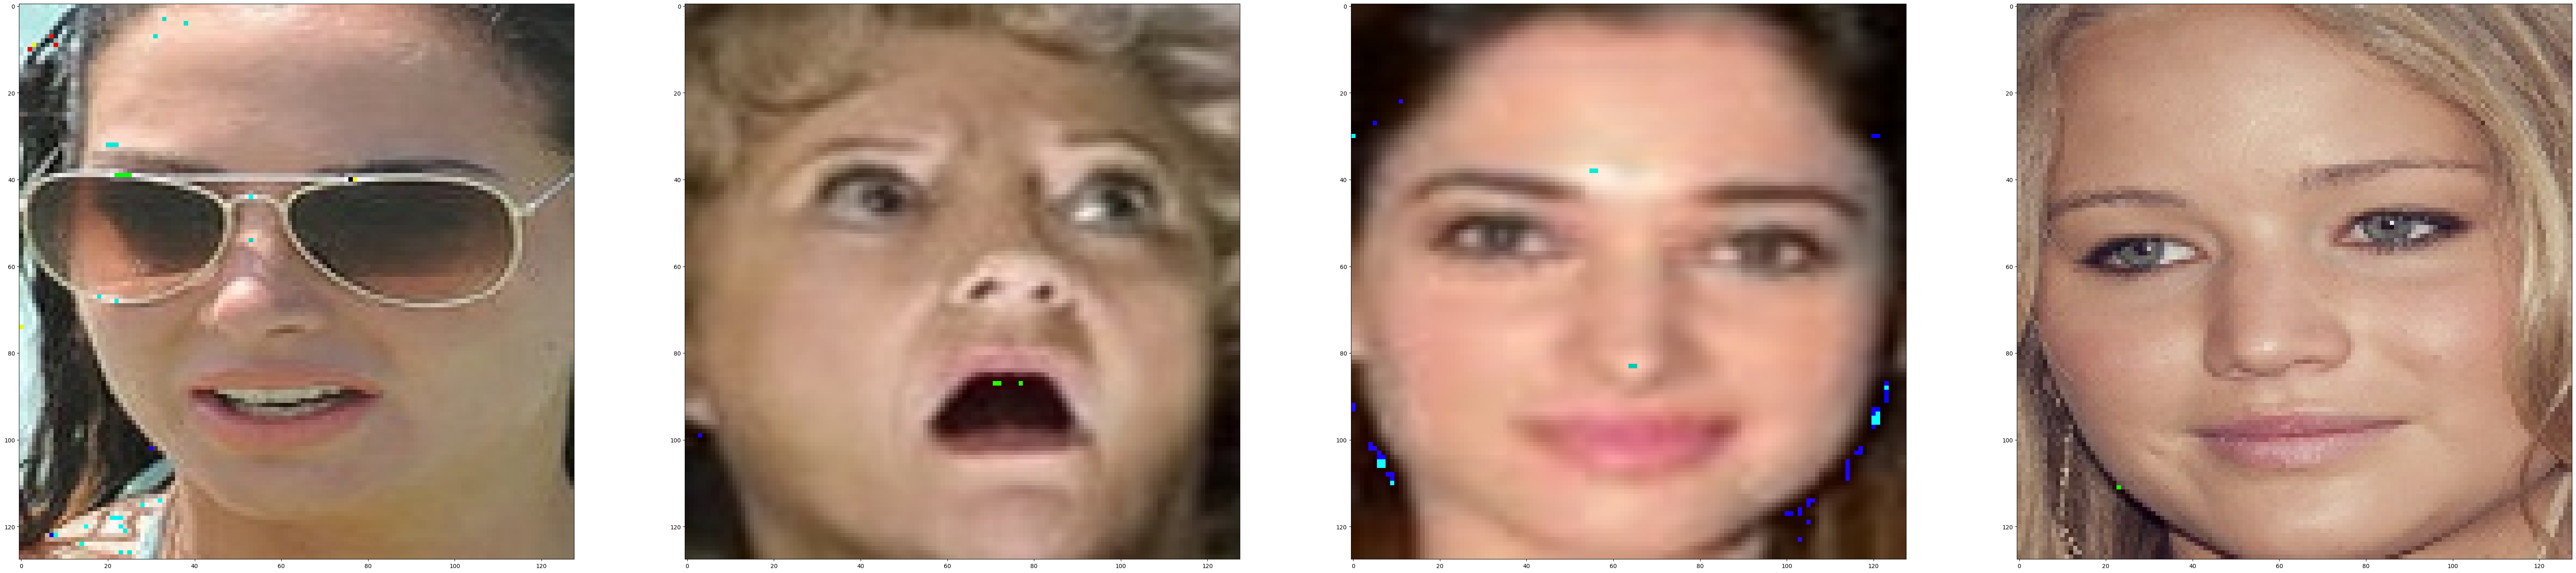

In [ ]:
fig , ax = plt.subplots(ncols= 4 , figsize=(80, 100))
ax[0].imshow(plot_images[0])
ax[1].imshow(plot_images[1])
ax[2].imshow(plot_images[2])
ax[3].imshow(plot_images[3])
plt.show()

In [ ]:
label1 = []
label1 , len(images1)

([], 2133)

In [ ]:
for i in range(len(images1)):
    label1.append([1])

In [ ]:
len(label1) , len(images1)

(2133, 2133)

In [ ]:
images= images.concatenate(images1)

In [ ]:
len(images)

4314

In [ ]:
labels = label + label1

In [ ]:
len(labels)

4314

In [ ]:
abc=tf.data.Dataset.from_tensor_slices(labels)

In [ ]:
dataset = tf.data.Dataset.zip((images , abc))

In [ ]:
len(dataset)

4314

In [ ]:
dataset=dataset.shuffle(len(dataset))

In [ ]:
dataset = dataset.batch(128)

In [ ]:
dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
xyz = dataset.as_numpy_iterator().next()
xyz

(array([[[[0.16078432, 0.18039216, 0.19215687],
          [0.1764706 , 0.18039216, 0.2       ],
          [0.21960784, 0.21568628, 0.24313726],
          ...,
          [0.05882353, 0.09411765, 0.08627451],
          [0.5058824 , 0.53333336, 0.47058824],
          [0.83137256, 0.85490197, 0.8039216 ]],
 
         [[0.18431373, 0.1882353 , 0.19607843],
          [0.18039216, 0.18431373, 0.2       ],
          [0.2       , 0.20392157, 0.22352941],
          ...,
          [0.07843138, 0.10588235, 0.14901961],
          [0.5019608 , 0.52156866, 0.49019608],
          [0.7411765 , 0.75686276, 0.69803923]],
 
         [[0.17254902, 0.18039216, 0.1764706 ],
          [0.1764706 , 0.18039216, 0.1882353 ],
          [0.20392157, 0.20784314, 0.22352941],
          ...,
          [0.08627451, 0.12156863, 0.16470589],
          [0.19215687, 0.23137255, 0.21176471],
          [0.654902  , 0.6784314 , 0.6313726 ]],
 
         ...,
 
         [[0.6039216 , 0.62352943, 0.5921569 ],
          [0.6    

(<matplotlib.image.AxesImage at 0x7faa8cb41f60>, array([1], dtype=int32))

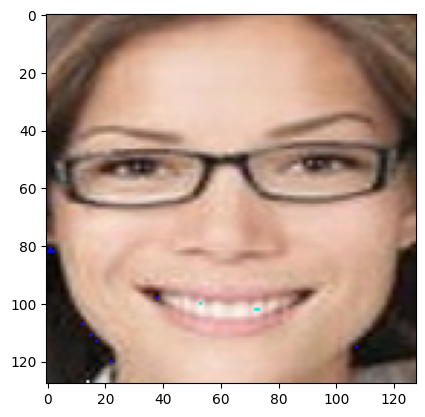

In [ ]:
plt.imshow(xyz[0][100]) , xyz[1][100]

In [ ]:

test1=tf.data.Dataset.list_files("test/man/*.jpg")

In [ ]:
test1.as_numpy_iterator().next()

b'test/man/064391.jpg.jpg'

In [ ]:
test1=test1.map(load_image)

In [ ]:
test1.as_numpy_iterator().next()

array([[[0.7607843 , 0.63529414, 0.4862745 ],
        [0.78039217, 0.654902  , 0.5058824 ],
        [0.7882353 , 0.6627451 , 0.5137255 ],
        ...,
        [0.46666667, 0.3529412 , 0.23529412],
        [0.5019608 , 0.39215687, 0.27450982],
        [0.5254902 , 0.41960785, 0.30588236]],

       [[0.77254903, 0.6431373 , 0.5058824 ],
        [0.76862746, 0.6431373 , 0.49803922],
        [0.75686276, 0.6313726 , 0.48235294],
        ...,
        [0.4       , 0.2901961 , 0.1764706 ],
        [0.44313726, 0.3372549 , 0.22352941],
        [0.47843137, 0.37254903, 0.25490198]],

       [[0.7764706 , 0.6431373 , 0.5137255 ],
        [0.7529412 , 0.62352943, 0.4862745 ],
        [0.72156864, 0.5882353 , 0.44705883],
        ...,
        [0.32156864, 0.21568628, 0.10588235],
        [0.3764706 , 0.27058825, 0.16470589],
        [0.4117647 , 0.30980393, 0.2       ]],

       ...,

       [[0.84705883, 0.8666667 , 0.79607844],
        [0.8392157 , 0.85882354, 0.7921569 ],
        [0.83137256, 0

In [ ]:
len(test1)

495

In [ ]:
tlab1=[]

In [ ]:
tlab1

[]

In [ ]:
for i in range(len(test1)):
    tlab1.append([0])

In [ ]:

test2=tf.data.Dataset.list_files("test/woman/*.jpg")

In [ ]:
test2.as_numpy_iterator().next()

b'test/woman/113813.jpg.jpg'

In [ ]:
test2=test2.map(load_image)

In [ ]:
test2.as_numpy_iterator().next()

array([[[0.20392157, 0.1254902 , 0.13333334],
        [0.23529412, 0.15686275, 0.16470589],
        [0.28627452, 0.20784314, 0.21568628],
        ...,
        [0.16470589, 0.09411765, 0.09411765],
        [0.18039216, 0.10980392, 0.10980392],
        [0.1882353 , 0.11764706, 0.11764706]],

       [[0.21568628, 0.13725491, 0.14509805],
        [0.23529412, 0.15686275, 0.16078432],
        [0.2627451 , 0.18431373, 0.1882353 ],
        ...,
        [0.14901961, 0.08235294, 0.07843138],
        [0.17254902, 0.10196079, 0.10196079],
        [0.18431373, 0.11372549, 0.11372549]],

       [[0.23529412, 0.16078432, 0.16470589],
        [0.23921569, 0.16470589, 0.16862746],
        [0.24705882, 0.16862746, 0.17254902],
        ...,
        [0.15294118, 0.08235294, 0.08627451],
        [0.1764706 , 0.10196079, 0.10588235],
        [0.1882353 , 0.11764706, 0.12156863]],

       ...,

       [[0.17254902, 0.09019608, 0.07058824],
        [0.18431373, 0.10196079, 0.08235294],
        [0.20392157, 0

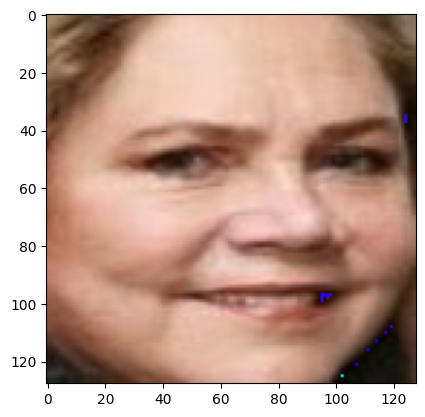

In [ ]:
plt.imshow(test2.as_numpy_iterator().next())

In [ ]:
tlab2 = []

In [ ]:
tlab2

[]

In [ ]:
for i in range(len(test2)):
    tlab2.append([1])

In [ ]:
len(test1) , len(tlab1) , len(test2) , len(tlab2)

(495, 495, 495, 495)

In [ ]:
test = test1.concatenate(test2)

In [ ]:
len(test)

990

In [ ]:
tlab=tlab1+tlab2

In [ ]:
len(tlab)

990

In [ ]:
tlabs=tf.data.Dataset.from_tensor_slices(tlab)

In [ ]:
len(tlabs)

990

In [ ]:
testdata = tf.data.Dataset.zip((test , tlabs))

In [ ]:
len(testdata)

990

In [ ]:
testdata=testdata.shuffle(len(testdata))

In [ ]:
testdata = testdata.batch(128)

In [ ]:
testdata = testdata.prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
model = VGG19(include_top=False , input_tensor=None, input_shape=(128 , 128 , 3))


80134624/80134624 [==============================] - 4s 0us/step


In [ ]:
model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Conv2D , Dense , GlobalMaxPooling2D

In [ ]:
def build_model():
    input_layer= Input(shape=(128 ,128 ,3))

    vgg = VGG19(include_top=False)(input_layer)

    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048 , activation='relu')(f1)
    class2 = Dense(1 , activation='sigmoid')(class1)


    gender = Model(inputs=input_layer , outputs=class2)
    return gender

In [ ]:
gender=build_model()

In [ ]:
gender.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_max_pooling2d (Globa  (None, 512)              0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 2048)              1050624   
                                                                 
 dense_1 (Dense)             (None, 1)                 2049      
                                                                 
Total params: 21,077,057
Trainable params: 21,077,057
Non-trainable params: 0
_________________________________________________

In [ ]:
X , Y = dataset.as_numpy_iterator().next()

In [ ]:
X.shape , X

((128, 128, 128, 3),
 array([[[[0.7294118 , 0.32156864, 0.02352941],
          [0.7411765 , 0.30980393, 0.02745098],
          [0.7176471 , 0.2627451 , 0.        ],
          ...,
          [0.15686275, 0.07450981, 0.10196079],
          [0.13725491, 0.07058824, 0.07843138],
          [0.13333334, 0.07450981, 0.06666667]],
 
         [[0.8862745 , 0.44313726, 0.16470589],
          [0.7921569 , 0.33333334, 0.0627451 ],
          [0.7294118 , 0.2627451 , 0.00392157],
          ...,
          [0.13725491, 0.06666667, 0.09411765],
          [0.14117648, 0.07058824, 0.08235294],
          [0.16078432, 0.10588235, 0.09411765]],
 
         [[0.9137255 , 0.43529412, 0.14901961],
          [0.8235294 , 0.34901962, 0.05882353],
          [0.7921569 , 0.33333334, 0.03921569],
          ...,
          [0.1254902 , 0.07058824, 0.09019608],
          [0.13333334, 0.07450981, 0.08235294],
          [0.13333334, 0.07843138, 0.07058824]],
 
         ...,
 
         [[0.6       , 0.45490196, 0.41960785

In [ ]:
Y.shape , Y

((128, 1),
 array([[0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
        [1],
        [0],
        [0],
        [0],
        [1],
        [1],
        [0],
        [0],
        [0],
        [0],
        [0],
        [1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [0],
        [0],
        [0],
 

In [ ]:
classes  = gender.predict(X)

4/4 [==============================] - 9s 31ms/step


In [ ]:
classes

array([[0.66603744],
       [0.6090148 ],
       [0.6738351 ],
       [0.616288  ],
       [0.63237303],
       [0.633784  ],
       [0.6585606 ],
       [0.6413005 ],
       [0.70964676],
       [0.66612756],
       [0.7114781 ],
       [0.6576876 ],
       [0.65645975],
       [0.6628824 ],
       [0.64269227],
       [0.57237864],
       [0.6423702 ],
       [0.64185655],
       [0.6555282 ],
       [0.58684874],
       [0.6620856 ],
       [0.60844576],
       [0.640783  ],
       [0.6841594 ],
       [0.7161177 ],
       [0.6177865 ],
       [0.6639011 ],
       [0.69663346],
       [0.6555573 ],
       [0.63736725],
       [0.68999   ],
       [0.64868456],
       [0.6566704 ],
       [0.7194081 ],
       [0.6313631 ],
       [0.6908716 ],
       [0.6730841 ],
       [0.64893305],
       [0.65929234],
       [0.696149  ],
       [0.68058336],
       [0.64428556],
       [0.6689033 ],
       [0.69424635],
       [0.647823  ],
       [0.6483781 ],
       [0.71165115],
       [0.667

In [ ]:
predict=np.empty_like(classes,dtype='S3')
for i in range(0, len(classes)):
    if(classes[i]>=0.5):
        predict[i]="female"
    else:
        predict[i]="male"
#predicted[i]=np.argmax(predicted[i])
print(predict)

[[b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']
 [b'fem']


In [ ]:
batches_per_epoch = len(dataset)
lr_decay = (1./0.75 -1)/batches_per_epoch

In [ ]:
opt=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001 , decay=lr_decay)

In [ ]:
classloss = tf.keras.losses.BinaryCrossentropy()

In [ ]:
classloss(Y , classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.73804796>

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [ ]:
gender.compile(opt , classloss ,metrics=["accuracy"] )

In [ ]:
hist = gender.fit(dataset,epochs = 100 , validation_data=testdata , callbacks=[callback])

Epoch 1/100
34/34 [==============================] - 66s 1s/step - loss: 0.5930 - accuracy: 0.6831 - val_loss: 0.5637 - val_accuracy: 0.7566
Epoch 2/100
34/34 [==============================] - 25s 656ms/step - loss: 0.2470 - accuracy: 0.9013 - val_loss: 0.1845 - val_accuracy: 0.9263
Epoch 3/100
34/34 [==============================] - 26s 675ms/step - loss: 0.1164 - accuracy: 0.9562 - val_loss: 0.1571 - val_accuracy: 0.9414
Epoch 4/100
34/34 [==============================] - 26s 663ms/step - loss: 0.0852 - accuracy: 0.9703 - val_loss: 0.2009 - val_accuracy: 0.9293
Epoch 5/100
34/34 [==============================] - 26s 667ms/step - loss: 0.0634 - accuracy: 0.9768 - val_loss: 0.1263 - val_accuracy: 0.9566
Epoch 6/100
34/34 [==============================] - 26s 667ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.1199 - val_accuracy: 0.9596
Epoch 7/100
34/34 [==============================] - 26s 668ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.1483 - val_accuracy: 0.

In [ ]:
hist.history

{'loss': [0.5930054187774658,
  0.24702753126621246,
  0.11644293367862701,
  0.08522409945726395,
  0.06337159126996994,
  0.0423797108232975,
  0.02577097713947296,
  0.01600554771721363,
  0.02176925167441368,
  0.00895043183118105,
  0.004014703445136547,
  0.0036800499074161053,
  0.002839934080839157,
  0.0020304396748542786,
  0.0014516108203679323,
  0.0012665465474128723,
  0.0013075611786916852,
  0.001395508530549705,
  0.0011747557437047362,
  0.0009714531479403377,
  0.0008371321600861847,
  0.0008142105652950704,
  0.0009328844607807696,
  0.0008567164186388254,
  0.0008227298385463655],
 'accuracy': [0.6831247210502625,
  0.9012517333030701,
  0.9561891555786133,
  0.9703291654586792,
  0.976819634437561,
  0.9870190024375916,
  0.9918868541717529,
  0.9949003458023071,
  0.9928140640258789,
  0.9976819753646851,
  0.9997681975364685,
  0.9993045926094055,
  0.999536395072937,
  0.999536395072937,
  0.9997681975364685,
  0.9997681975364685,
  0.9997681975364685,
  0.9997

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

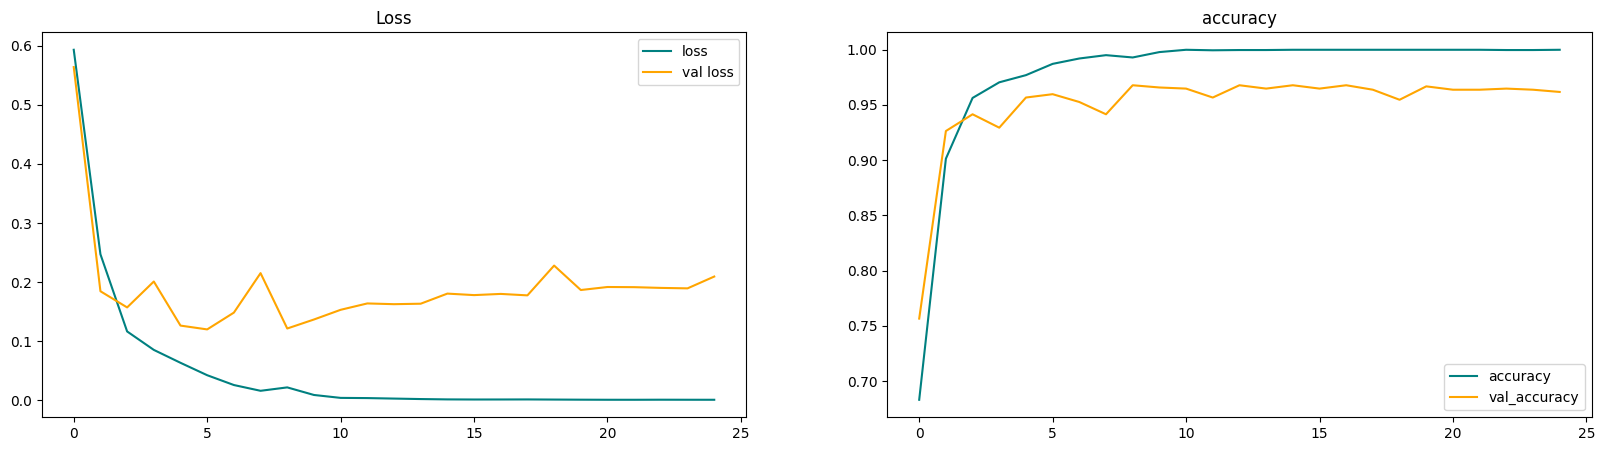

In [ ]:
fig , ax = plt.subplots(ncols = 2, figsize=(20 , 5))

ax[0].plot(hist.history['loss'], color='teal' , label='loss')
ax[0].plot(hist.history['val_loss'] , color='orange' , label='val loss' )
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['accuracy'], color='teal' , label='accuracy')
ax[1].plot(hist.history['val_accuracy'] , color='orange' , label='val_accuracy' )
ax[1].title.set_text('accuracy')
ax[1].legend()

In [ ]:
cd drive/MyDrive/

/content/drive/MyDrive


In [ ]:
from tensorflow.keras.models import load_model
gender.save('gender20c.h5')

In [ ]:
from google.colab import files
files.download('gender20c.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>